In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import numpy as np
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
from matplotlib import animation,rc
import io
import base64
from IPython.display import HTML, display
import warnings
warnings.filterwarnings('ignore')
from scipy.misc import imread
import codecs
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
sns.set()

globalterrorismdb_0718dist.csv



In [2]:
terror=pd.read_csv('../input/globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')
terror.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
terror=terror[['Year','Month','Day','Country','Region','city','latitude','longitude','AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]
terror['casualities']=terror['Killed']+terror['Wounded']
terror.head(3)

Year  Month  Day     ...     Weapon_type Motive casualities
0  1970      7    2     ...         Unknown    NaN         1.0
1  1970      0    0     ...         Unknown    NaN         0.0
2  1970      1    0     ...         Unknown    NaN         1.0

[3 rows x 18 columns]

In [3]:
def barplot_categories(data:pd.Series,xlabel:str,ylabel:str,title:str):
    f, ax = plt.subplots(figsize=(10, 8)) 
    plt.xticks(rotation='90') 
    sns.barplot(data.index,data)
    plt.xlabel(xlabel, fontsize=15) 
    plt.ylabel(ylabel, fontsize=15) 
    plt.title(title, fontsize=15)

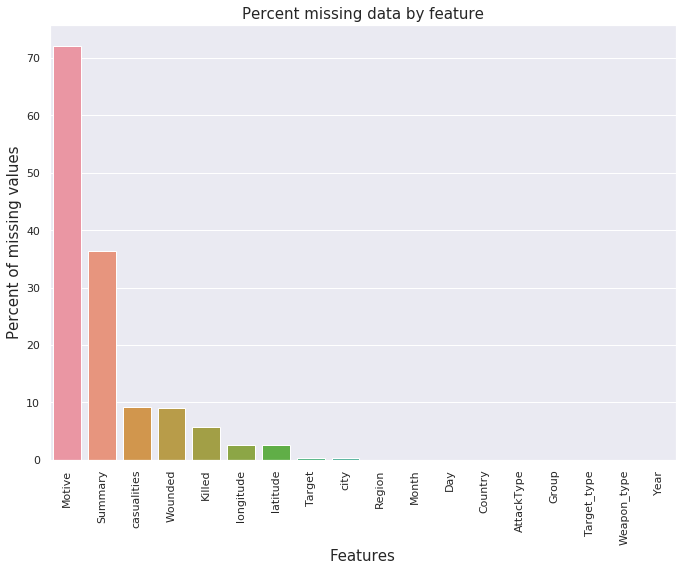

In [4]:
na_values = ((terror.isnull().sum()/len(terror))*100).sort_values(ascending=False)
barplot_categories(na_values,'Features','Percent of missing values','Percent missing data by feature')

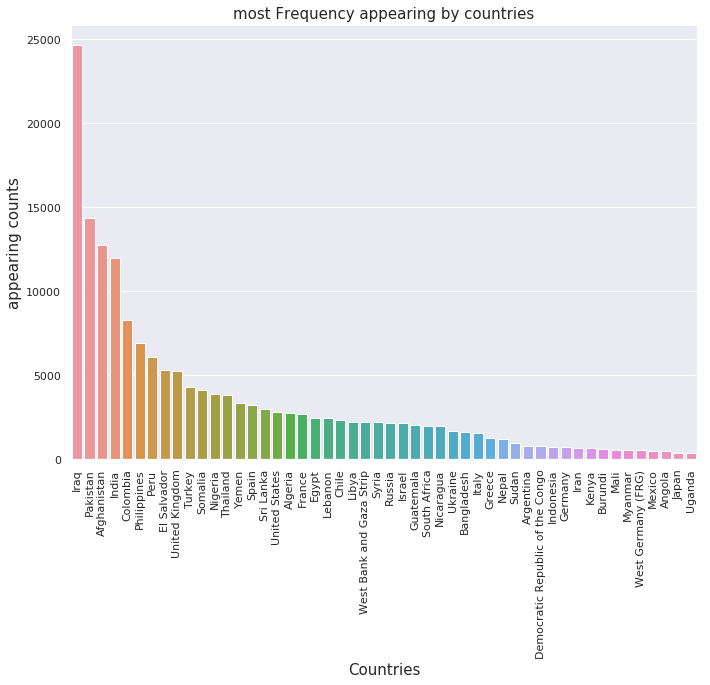

In [5]:
barplot_categories(terror['Country'].value_counts().head(50),'Countries','appearing counts','most Frequency appearing by countries')

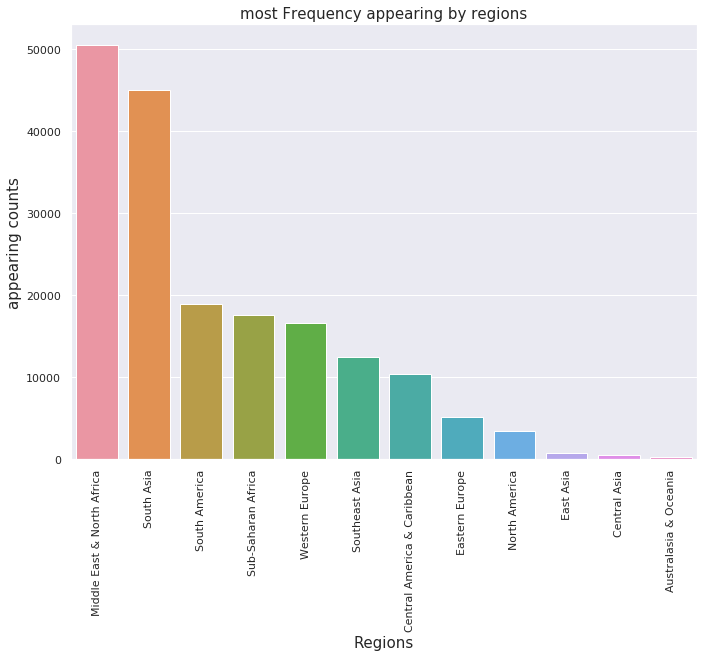

In [6]:
barplot_categories(terror['Region'].value_counts().head(50),'Regions','appearing counts','most Frequency appearing by regions')

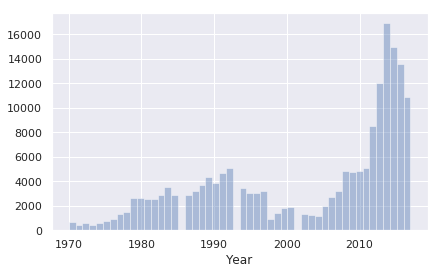

In [7]:
sns.distplot(terror['Year'],kde=False)

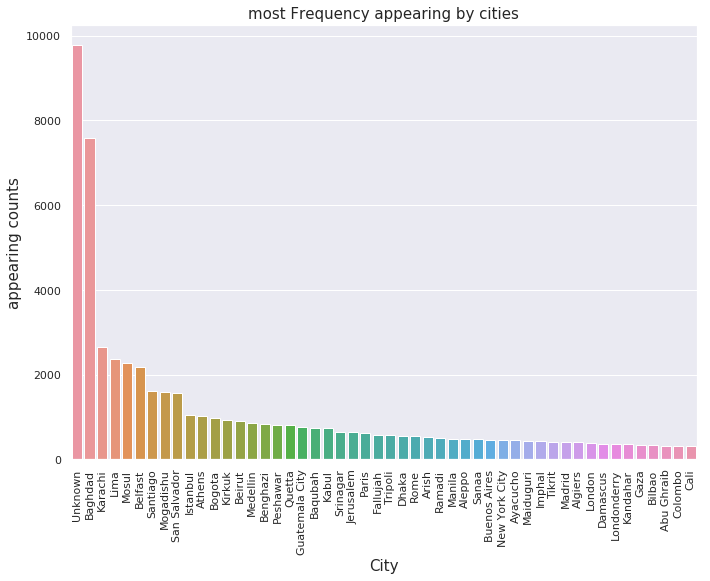

In [8]:
barplot_categories(terror['city'].value_counts().head(50),'City','appearing counts','most Frequency appearing by cities')

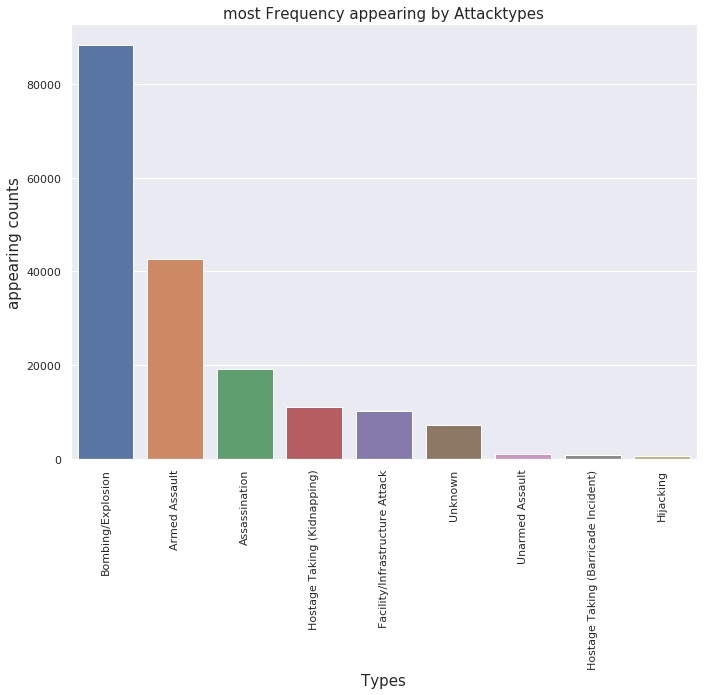

In [9]:
barplot_categories(terror['AttackType'].value_counts().head(50),'Types','appearing counts','most Frequency appearing by Attacktypes')

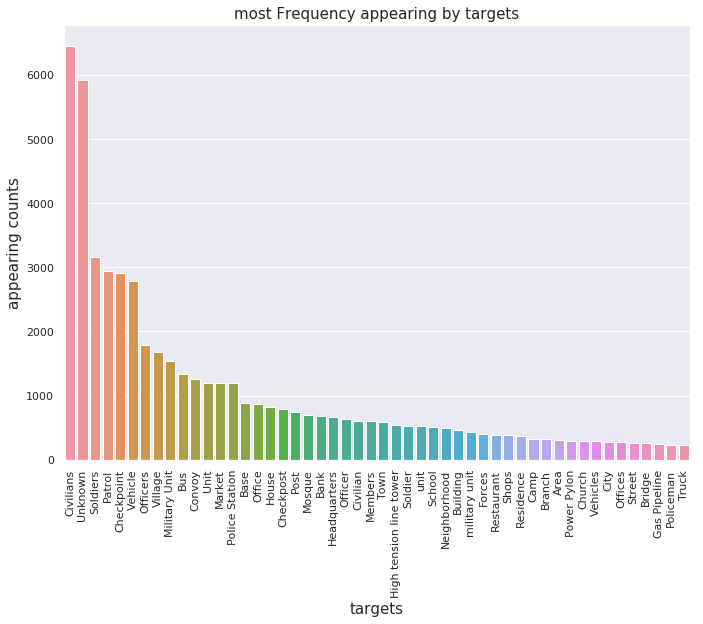

In [10]:
barplot_categories(terror['Target'].value_counts().head(50),'targets','appearing counts','most Frequency appearing by targets')

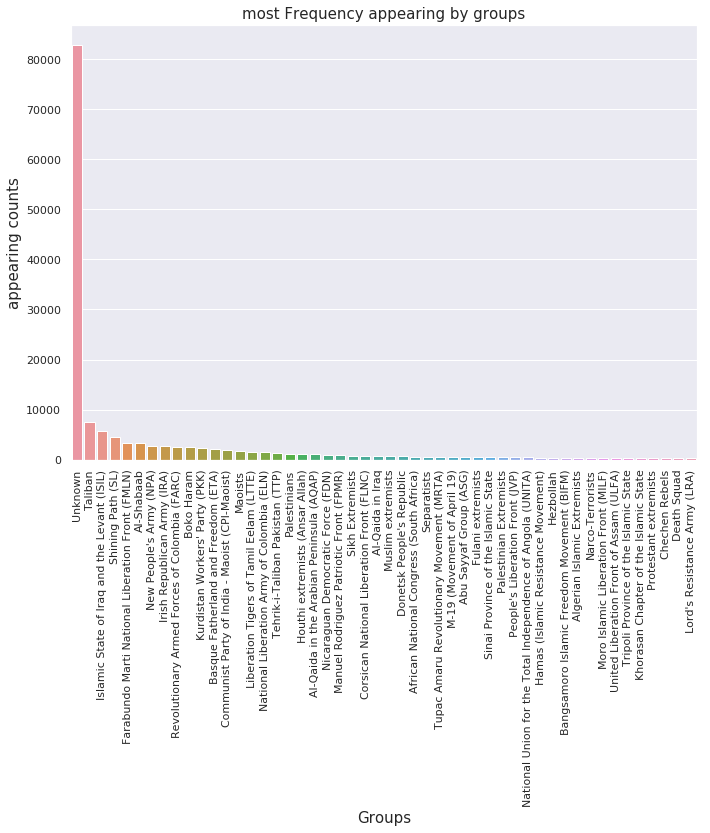

In [11]:
barplot_categories(terror['Group'].value_counts().head(50),'Groups','appearing counts','most Frequency appearing by groups')

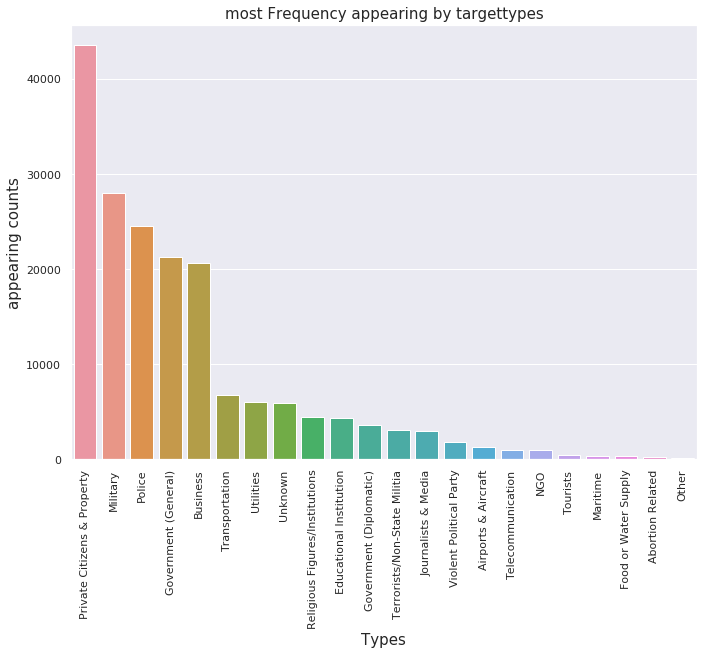

In [12]:
barplot_categories(terror['Target_type'].value_counts().head(50),'Types','appearing counts','most Frequency appearing by targettypes')

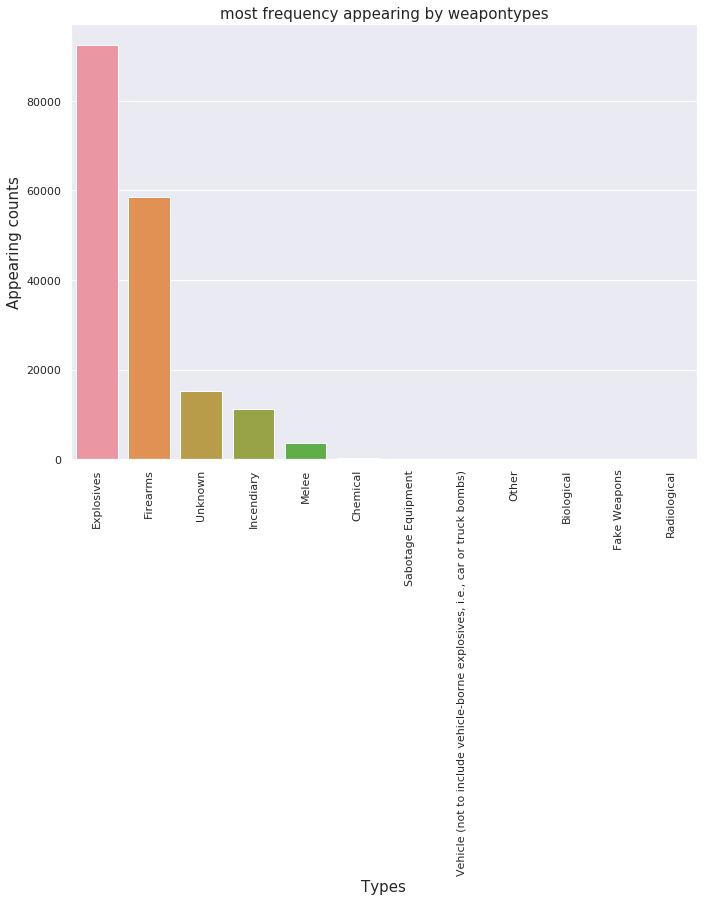

In [13]:
barplot_categories(terror['Weapon_type'].value_counts(),'Types','Appearing counts','most frequency appearing by weapontypes')

In [14]:
killed_each_wtypes = pd.pivot_table(data=terror,index='Weapon_type',values='Killed',aggfunc='mean').reset_index()
killed_each_wtypes.index = killed_each_wtypes['Weapon_type']

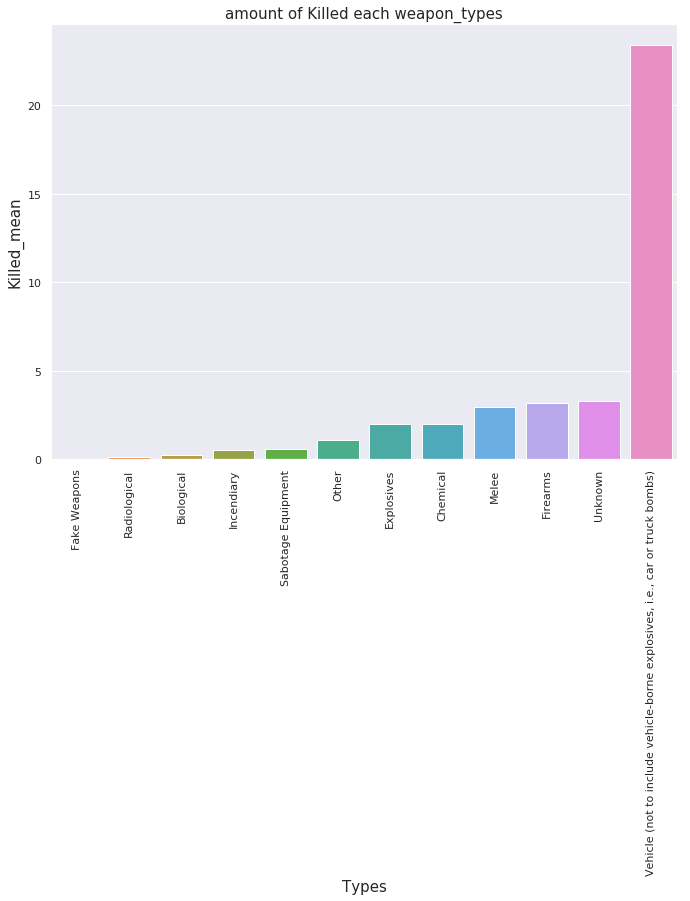

In [17]:
barplot_categories(killed_each_wtypes['Killed'].sort_values(),'Types','Killed_mean','amount of Killed each weapon_types')

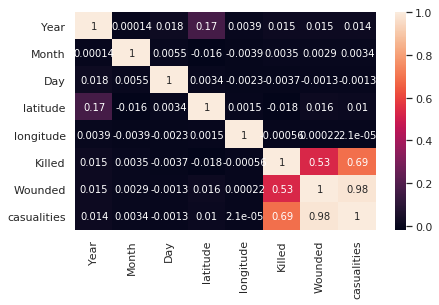

In [16]:
sns.heatmap(terror.corr(),annot=True)